In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data =pd.read_csv('/workspaces/projects/TTC_Delay_Analysis/data.csv')

In [3]:
print(len(data['Route'].unique().tolist()))

205


In [4]:
data1 = data
incident_mapping = {
    'Operations - Operator': 'Operation',
    'Cleaning - Disinfection': 'Operation',
    'Cleaning - Unsanitary': 'Operation',
    'Late Entering Service': 'Operation',
    'Collision - TTC': 'Collision',
    'Road Blocked - NON-TTC Collision': 'Collision',
    'Security': 'Security',
    'Emergency Services': 'Security',
    'Investigation': 'Security',
    'Held By': 'Security',
    'Mechanical': 'Mechanical',
    'Diversion': 'Summer',
    'Utilized Off Route': 'Diversion',
    'Vision': 'Weather and Other',
    'General Delay': 'Weather and Other'
}

# Apply the mapping to create a new 'Incident_Category' column
data1['Incident'] = data['Incident'].map(incident_mapping)
data1['Incident'].value_counts()

Incident
Mechanical           33228
Operation            32413
Security             12112
Collision             7044
Weather and Other     6172
Summer                5713
Diversion             5149
Name: count, dtype: int64

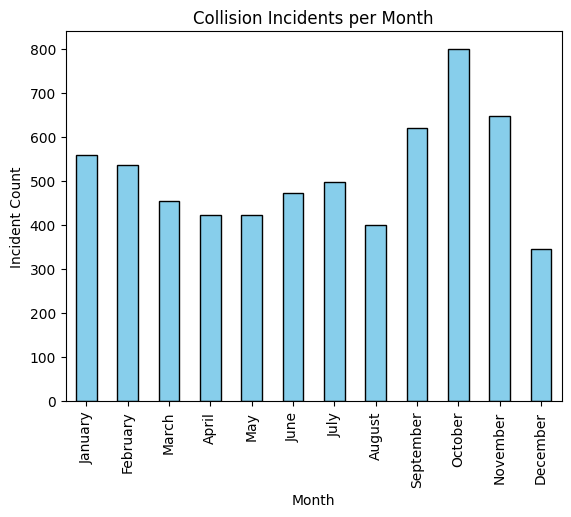

In [5]:
collision_df = data[data['Incident'] == 'Weather and Other']

# Create a custom order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Count incidents per month and reindex to the custom order
incident_counts = collision_df['Month'].value_counts().reindex(month_order, fill_value=0)

# Plotting the counts
incident_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.title('Collision Incidents per Month')
plt.show()


In [6]:
from datetime import datetime
current_datetime = datetime.now()
day = current_datetime.day
year = current_datetime.year
month = current_datetime.month
day_num = current_datetime.weekday() + 1  # Adding 1 to make Monday as 1
hour = current_datetime.hour
minute = current_datetime.minute
month

1

In [7]:
data1=data1.drop(['Date','Min Gap','Vehicle','Time','Route Name'],axis=1)
data1

,Route,Day,Location,Incident,Min Delay,Year,Month,Day_Num,Hour,Minute,day_part
0,325,Saturday,OVERLEA AND THORCLIFFE,Summer,131,2022,January,1,2,0,Night
1,320,Saturday,YONGE AND STEELES,Operation,17,2022,January,1,2,0,Night
2,320,Saturday,YONGE AND STEELES,Operation,4,2022,January,1,2,7,Night
3,320,Saturday,YONGE AND STEELES,Operation,4,2022,January,1,2,13,Night
4,363,Saturday,KING AND SHAW,Operation,30,2022,January,1,2,16,Night
...,...,...,...,...,...,...,...,...,...,...,...
101826,84,Thursday,SHEPPARD-YONGE STATION,Mechanical,10,2023,November,30,0,1,Night
101827,960,Thursday,STEELES AND GERRY FITZ,Mechanical,24,2023,November,30,0,25,Night
101828,116,Thursday,KENNEDY STATION,Operation,10,2023,November,30,0,44,Night
101829,7,Thursday,FISHERVILLE AND BATHUR,Operation,11,2023,November,30,0,48,Night


In [8]:
data1['Month'] = pd.to_datetime(data1['Month'], format='%B').dt.month
weekday_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

data1['Day'] = data1['Day'].map(weekday_mapping)

In [9]:
data2 = data3 =data1
data3 = data1.copy()
data3 = data3.drop('Incident',axis=1)
data3

,Route,Day,Location,Min Delay,Year,Month,Day_Num,Hour,Minute,day_part
0,325,5,OVERLEA AND THORCLIFFE,131,2022,1,1,2,0,Night
1,320,5,YONGE AND STEELES,17,2022,1,1,2,0,Night
2,320,5,YONGE AND STEELES,4,2022,1,1,2,7,Night
3,320,5,YONGE AND STEELES,4,2022,1,1,2,13,Night
4,363,5,KING AND SHAW,30,2022,1,1,2,16,Night
...,...,...,...,...,...,...,...,...,...,...
101826,84,3,SHEPPARD-YONGE STATION,10,2023,11,30,0,1,Night
101827,960,3,STEELES AND GERRY FITZ,24,2023,11,30,0,25,Night
101828,116,3,KENNEDY STATION,10,2023,11,30,0,44,Night
101829,7,3,FISHERVILLE AND BATHUR,11,2023,11,30,0,48,Night


In [10]:
data3['Location']

0         OVERLEA AND THORCLIFFE
1              YONGE AND STEELES
2              YONGE AND STEELES
3              YONGE AND STEELES
4                  KING AND SHAW
                   ...          
101826    SHEPPARD-YONGE STATION
101827    STEELES AND GERRY FITZ
101828           KENNEDY STATION
101829    FISHERVILLE AND BATHUR
101830           KIPLING STATION
Name: Location, Length: 101831, dtype: object

In [27]:
data3['New_Location'] = data3['Location'].apply(lambda x: x.split()[0] + ', Toronto')

# Display the DataFrame with the new column
data3

,Route,Day,Location,Min Delay,Year,Month,Day_Num,Hour,Minute,day_part,New_Location
0,325,5,OVERLEA AND THORCLIFFE,131,2022,1,1,2,0,Night,"OVERLEA, Toronto"
1,320,5,YONGE AND STEELES,17,2022,1,1,2,0,Night,"YONGE, Toronto"
2,320,5,YONGE AND STEELES,4,2022,1,1,2,7,Night,"YONGE, Toronto"
3,320,5,YONGE AND STEELES,4,2022,1,1,2,13,Night,"YONGE, Toronto"
4,363,5,KING AND SHAW,30,2022,1,1,2,16,Night,"KING, Toronto"
...,...,...,...,...,...,...,...,...,...,...,...
101826,84,3,SHEPPARD-YONGE STATION,10,2023,11,30,0,1,Night,"SHEPPARD-YONGE, Toronto"
101827,960,3,STEELES AND GERRY FITZ,24,2023,11,30,0,25,Night,"STEELES, Toronto"
101828,116,3,KENNEDY STATION,10,2023,11,30,0,44,Night,"KENNEDY, Toronto"
101829,7,3,FISHERVILLE AND BATHUR,11,2023,11,30,0,48,Night,"FISHERVILLE, Toronto"


In [35]:
data3.to_csv('data3.csv',index=False)

## Min Delay Prediction

In [9]:
X_reg = data3.drop(columns=['Min Delay'])
y_reg = data3['Min Delay']

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assume X_reg and y_reg are your features and target variable
# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Identify numerical and categorical features
numeric_features_reg = X_reg.select_dtypes(include='number').columns.tolist()
categorical_features_reg = X_reg.select_dtypes(include='object').columns.tolist()

# Remove the target variable from numerical features if it's present
numeric_features_reg = [feature for feature in numeric_features_reg if feature != 'Min Delay']

# Create transformers for numerical and categorical features for regression
numeric_transformer_reg = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer_reg = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create column transformer for regression
preprocessor_reg = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_reg, numeric_features_reg),
        ('cat', categorical_transformer_reg, categorical_features_reg)
    ])

#### GradientBoostingRegressor

In [12]:
# Create the Gradient Boosting regressor
regressor_gb = GradientBoostingRegressor(random_state=42)

# Create the full pipeline with preprocessing and Gradient Boosting
full_pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor_reg),
    ('regressor', regressor_gb)
])

# Define the parameter grid for GridSearchCV
param_grid_gb = {
    'regressor__n_estimators': [100],
    'regressor__learning_rate': [0.1],
}

# Create the GridSearchCV object for Gradient Boosting
grid_search_gb = GridSearchCV(full_pipeline_gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search_gb.fit(X_train_reg, y_train_reg)

# Access the best parameters from the grid search results
best_params_gb = grid_search_gb.best_estimator_.named_steps['regressor'].get_params()
print(best_params_gb)

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [14]:
# Create the Gradient Boosting regressor with the best parameters
regressor_gb_best = GradientBoostingRegressor(**best_params_gb)

# Create the full pipeline with preprocessing and the best Gradient Boosting regressor
full_pipeline_gb_best = Pipeline(steps=[
    ('preprocessor', preprocessor_reg),
    ('regressor', regressor_gb_best)
])

# Fit the model to the data (using the whole dataset for simplicity)
full_pipeline_gb_best.fit(X_reg, y_reg)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Day', 'Year', 'Month',
                                                   'Day_Num', 'Hour',
                                                   'Minute']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'Route Name',
                                                   'day_part'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate predictions for training and testing sets
predictions_train_gb = full_pipeline_gb_best.predict(X_train_reg)
predictions_test_gb = full_pipeline_gb_best.predict(X_test_reg)

# Calculate scores for training set
mse_train_gb = mean_squared_error(y_train_reg, predictions_train_gb)
mae_train_gb = mean_absolute_error(y_train_reg, predictions_train_gb)
r2_train_gb = r2_score(y_train_reg, predictions_train_gb)

# Calculate scores for testing set
mse_test_gb = mean_squared_error(y_test_reg, predictions_test_gb)
mae_test_gb = mean_absolute_error(y_test_reg, predictions_test_gb)
r2_test_gb = r2_score(y_test_reg, predictions_test_gb)

# Display scores
print("Gradient Boosting Regression Scores - Training Set:")
print("Mean Squared Error (MSE):", mse_train_gb)
print("Mean Absolute Error (MAE):", mae_train_gb)
print("R-squared:", r2_train_gb)

print("\nGradient Boosting Regression Scores - Testing Set:")
print("Mean Squared Error (MSE):", mse_test_gb)
print("Mean Absolute Error (MAE):", mae_test_gb)
print("R-squared:", r2_test_gb)

Gradient Boosting Regression Scores - Training Set:
Mean Squared Error (MSE): 2232.738131879257
Mean Absolute Error (MAE): 15.393801320569423
R-squared: 0.1314072028605816

Gradient Boosting Regression Scores - Testing Set:
Mean Squared Error (MSE): 2480.125277508695
Mean Absolute Error (MAE): 15.818939163305563
R-squared: 0.1353255048619949


#### Ridge Regressor

In [22]:
from sklearn.linear_model import Ridge
# Create the Ridge regressor
regressor_ridge = Ridge()

# Create the full pipeline with preprocessing and Ridge regression
full_pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor_reg),
    ('regressor', regressor_ridge)
])

# Define the parameter grid for GridSearchCV
param_grid_ridge = {
    'regressor__alpha': [0.1, 1.0, 10.0],
}

# Create the GridSearchCV object for Ridge regression
grid_search_ridge = GridSearchCV(full_pipeline_ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search_ridge.fit(X_train_reg, y_train_reg)

# Access the best parameters from the grid search results
best_params_ridge = grid_search_ridge.best_estimator_.named_steps['regressor'].get_params()
print(best_params_ridge)

{'alpha': 10.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


In [25]:
# Access the best parameters from the grid search results
best_params_ridge = grid_search_ridge.best_params_

# Create the Ridge regressor with the best parameters
regressor_ridge = Ridge(alpha=best_params_ridge['regressor__alpha'])

# Create the full pipeline with preprocessing and Ridge regression
full_pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor_reg),
    ('regressor', regressor_ridge)
])

# Fit the model to the data (you can use the whole dataset for simplicity)
full_pipeline_ridge.fit(X_reg, y_reg)

# Make predictions for training and testing sets
predictions_train_ridge = full_pipeline_ridge.predict(X_train_reg)
predictions_test_ridge = full_pipeline_ridge.predict(X_test_reg)


In [26]:
# Calculate MSE, RMSE, and R2 for training set
mse_train_ridge = mean_squared_error(y_train_reg, predictions_train_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
r2_train_ridge = r2_score(y_train_reg, predictions_train_ridge)

print(f"Ridge Regression - Train MSE: {mse_train_ridge}")
print(f"Ridge Regression - Train RMSE: {rmse_train_ridge}")
print(f"Ridge Regression - Train R2: {r2_train_ridge}")

# Calculate MSE, RMSE, and R2 for test set
mse_test_ridge = mean_squared_error(y_test_reg, predictions_test_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test_reg, predictions_test_ridge)

print(f"Ridge Regression - Test MSE: {mse_test_ridge}")
print(f"Ridge Regression - Test RMSE: {rmse_test_ridge}")
print(f"Ridge Regression - Test R2: {r2_test_ridge}")

Ridge Regression - Train MSE: 2128.673057195623
Ridge Regression - Train RMSE: 46.13754498448767
Ridge Regression - Train R2: 0.17189120455042617
Ridge Regression - Test MSE: 2309.159946816625
Ridge Regression - Test RMSE: 48.053719385877145
Ridge Regression - Test R2: 0.19493110718494022


## Lasso

In [11]:
from sklearn.linear_model import Lasso
# Create the Lasso regressor
regressor_lasso = Lasso()

# Create the full pipeline with preprocessing and Lasso regression
full_pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor_reg),
    ('regressor', regressor_lasso)
])

# Define the parameter grid for GridSearchCV
param_grid_lasso = {
    'regressor__alpha': [0.1, 1.0, 10.0],
}

# Create the GridSearchCV object for Lasso regression
grid_search_lasso = GridSearchCV(full_pipeline_lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search_lasso.fit(X_train_reg, y_train_reg)

# Access the best parameters from the grid search results
best_params_lasso = grid_search_lasso.best_estimator_.named_steps['regressor'].get_params()
print(best_params_lasso)

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [12]:
# Access the best parameters from the grid search results
best_params_lasso = grid_search_lasso.best_params_

# Create the Lasso regressor with the best parameters
regressor_lasso = Lasso(alpha=best_params_lasso['regressor__alpha'])

# Create the full pipeline with preprocessing and Lasso regression
full_pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor_reg),
    ('regressor', regressor_lasso)
])

# Fit the model to the data (you can use the whole dataset for simplicity)
full_pipeline_lasso.fit(X_reg, y_reg)

# Make predictions for training and testing sets
predictions_train_lasso = full_pipeline_lasso.predict(X_train_reg)
predictions_test_lasso = full_pipeline_lasso.predict(X_test_reg)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate MSE, RMSE, and R2 for training set (Lasso)
mse_train_lasso = mean_squared_error(y_train_reg, predictions_train_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)
r2_train_lasso = r2_score(y_train_reg, predictions_train_lasso)

print(f"Lasso Regression - Train MSE: {mse_train_lasso}")
print(f"Lasso Regression - Train RMSE: {rmse_train_lasso}")
print(f"Lasso Regression - Train R2: {r2_train_lasso}")

# Calculate MSE, RMSE, and R2 for test set (Lasso)
mse_test_lasso = mean_squared_error(y_test_reg, predictions_test_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)
r2_test_lasso = r2_score(y_test_reg, predictions_test_lasso)

print(f"Lasso Regression - Test MSE: {mse_test_lasso}")
print(f"Lasso Regression - Test RMSE: {rmse_test_lasso}")
print(f"Lasso Regression - Test R2: {r2_test_lasso}")

Lasso Regression - Train MSE: 2553.734092625608
Lasso Regression - Train RMSE: 50.53448419273326
Lasso Regression - Train R2: 0.006531483924185677
Lasso Regression - Test MSE: 2847.087024652818
Lasso Regression - Test RMSE: 53.35810177145377
Lasso Regression - Test R2: 0.007387425957554372


## Incident Classification

In [19]:
# Extract features and target variable
X = data2.drop(columns=['Incident'])
y = data2['Incident']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = data2.select_dtypes(include='number').columns.tolist()
categorical_features = data2.select_dtypes(include='object').columns.tolist()
categorical_features.remove("Incident")

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#### GradientBoosting

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
#Create Gradient Boosting classifier
classifier_gb = GradientBoostingClassifier(random_state=42)

# Create the full pipeline with preprocessing and Gradient Boosting
full_pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier_gb)
])

# Define the parameter grid for GridSearchCV
param_grid_gb = {
    'classifier__n_estimators': [100],
    'classifier__learning_rate': [0.1],
}

# Create the GridSearchCV object for Gradient Boosting
grid_search_gb = GridSearchCV(full_pipeline_gb, param_grid_gb, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search_gb.fit(X_train, y_train)

# Print the best parameters and the corresponding mean cross-validated score
print("Best Parameters: ", grid_search_gb.best_params_)
print("Best Score: ", grid_search_gb.best_score_)

Best Parameters:  {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}
Best Score:  0.45985955628505615


In [21]:
best_params_gb = grid_search_gb.best_params_

# Create the Gradient Boosting classifier with the best parameters
classifier_gb = GradientBoostingClassifier(
    n_estimators=best_params_gb['classifier__n_estimators'],
    learning_rate=best_params_gb['classifier__learning_rate'],
    random_state=42
)

# Create the full pipeline with preprocessing and Gradient Boosting
full_pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier_gb)
])

# Fit the model to the data (you can use the whole dataset for simplicity)
full_pipeline_gb.fit(X, y)

# Make predictions for training and testing sets
predictions_train_gb = full_pipeline_gb.predict(X_train)
predictions_test_gb = full_pipeline_gb.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Calculate accuracy, precision, recall, F1 score, and confusion matrix for training set
accuracy_train_gb = accuracy_score(y_train, predictions_train_gb)
precision_train_gb = precision_score(y_train, predictions_train_gb, average='weighted')
recall_train_gb = recall_score(y_train, predictions_train_gb, average='weighted')
f1_train_gb = f1_score(y_train, predictions_train_gb, average='weighted')

print(f"Gradient Boosting Classifier - Train Accuracy: {accuracy_train_gb}")
print(f"Gradient Boosting Classifier - Train Precision: {precision_train_gb}")
print(f"Gradient Boosting Classifier - Train Recall: {recall_train_gb}")
print(f"Gradient Boosting Classifier - Train F1 Score: {f1_train_gb}")

# Calculate accuracy, precision, recall, F1 score, and confusion matrix for test set
accuracy_test_gb = accuracy_score(y_test, predictions_test_gb)
precision_test_gb = precision_score(y_test, predictions_test_gb, average='weighted')
recall_test_gb = recall_score(y_test, predictions_test_gb, average='weighted')
f1_test_gb = f1_score(y_test, predictions_test_gb, average='weighted')

print(f"Gradient Boosting Classifier - Test Accuracy: {accuracy_test_gb}")
print(f"Gradient Boosting Classifier - Test Precision: {precision_test_gb}")
print(f"Gradient Boosting Classifier - Test Recall: {recall_test_gb}")
print(f"Gradient Boosting Classifier - Test F1 Score: {f1_test_gb}")

Gradient Boosting Classifier - Train Accuracy: 0.47068643818128253
Gradient Boosting Classifier - Train Precision: 0.5157135584242762
Gradient Boosting Classifier - Train Recall: 0.47068643818128253
Gradient Boosting Classifier - Train F1 Score: 0.42687944819216944
Gradient Boosting Classifier - Test Accuracy: 0.4675700888692493
Gradient Boosting Classifier - Test Precision: 0.5100745197477318
Gradient Boosting Classifier - Test Recall: 0.4675700888692493
Gradient Boosting Classifier - Test F1 Score: 0.4226813045771455


#### Adaboost

In [40]:
from sklearn.ensemble import AdaBoostClassifier
# Create AdaBoost classifier
classifier_adaboost = AdaBoostClassifier(random_state=42)

# Create the full pipeline with preprocessing and AdaBoost
full_pipeline_adaboost = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier_adaboost)
])

# Define the parameter grid for GridSearchCV
param_grid_adaboost = {
    'classifier__n_estimators': [100],
    'classifier__learning_rate': [0.1],
}

# Create the GridSearchCV object for AdaBoost
grid_search_adaboost = GridSearchCV(full_pipeline_adaboost, param_grid_adaboost, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search_adaboost.fit(X_train, y_train)

# Print the best parameters and the corresponding mean cross-validated score
print("Best Parameters: ", grid_search_adaboost.best_params_)
print("Best Score: ", grid_search_adaboost.best_score_)

Best Parameters:  {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}
Best Score:  0.41806201796047393


In [41]:
# Access the best parameters from the grid search results
best_params_adaboost = grid_search_adaboost.best_params_

# Create the AdaBoost classifier with the best parameters
classifier_adaboost = AdaBoostClassifier(
    n_estimators=best_params_adaboost['classifier__n_estimators'],
    learning_rate=best_params_adaboost['classifier__learning_rate'],
    random_state=42
)

# Create the full pipeline with preprocessing and AdaBoost
full_pipeline_adaboost = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier_adaboost)
])

# Fit the model to the data (you can use the whole dataset for simplicity)
full_pipeline_adaboost.fit(X, y)

# Make predictions for training and testing sets
predictions_train_adaboost = full_pipeline_adaboost.predict(X_train)
predictions_test_adaboost = full_pipeline_adaboost.predict(X_test)

In [42]:
# Calculate accuracy, precision, recall, F1 score, and confusion matrix for training set
accuracy_train_adaboost = accuracy_score(y_train, predictions_train_adaboost)
precision_train_adaboost = precision_score(y_train, predictions_train_adaboost, average='weighted')
recall_train_adaboost = recall_score(y_train, predictions_train_adaboost, average='weighted')
f1_train_adaboost = f1_score(y_train, predictions_train_adaboost, average='weighted')
confusion_matrix_train_adaboost = confusion_matrix(y_train, predictions_train_adaboost)

print(f"AdaBoost Classifier - Train Accuracy: {accuracy_train_adaboost}")
print(f"AdaBoost Classifier - Train Precision: {precision_train_adaboost}")
print(f"AdaBoost Classifier - Train Recall: {recall_train_adaboost}")
print(f"AdaBoost Classifier - Train F1 Score: {f1_train_adaboost}")

# Calculate accuracy, precision, recall, F1 score, and confusion matrix for test set
accuracy_test_adaboost = accuracy_score(y_test, predictions_test_adaboost)
precision_test_adaboost = precision_score(y_test, predictions_test_adaboost, average='weighted')
recall_test_adaboost = recall_score(y_test, predictions_test_adaboost, average='weighted')
f1_test_adaboost = f1_score(y_test, predictions_test_adaboost, average='weighted')
confusion_matrix_test_adaboost = confusion_matrix(y_test, predictions_test_adaboost)

print(f"AdaBoost Classifier - Test Accuracy: {accuracy_test_adaboost}")
print(f"AdaBoost Classifier - Test Precision: {precision_test_adaboost}")
print(f"AdaBoost Classifier - Test Recall: {recall_test_adaboost}")
print(f"AdaBoost Classifier - Test F1 Score: {f1_test_adaboost}")

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost Classifier - Train Accuracy: 0.41808651674359226
AdaBoost Classifier - Train Precision: 0.38900783366957675
AdaBoost Classifier - Train Recall: 0.41808651674359226
AdaBoost Classifier - Train F1 Score: 0.3599789663236127


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost Classifier - Test Accuracy: 0.41670349094122844
AdaBoost Classifier - Test Precision: 0.3934148378515778
AdaBoost Classifier - Test Recall: 0.41670349094122844
AdaBoost Classifier - Test F1 Score: 0.3582723808070601


In [24]:
import pickle

# Save the Gradient Boosting model
with open('/workspaces/projects/Maintainance_Prediction/incident.pkl', 'wb') as file:
    pickle.dump(full_pipeline_gb, file)

# Save the Lasso model
with open('/workspaces/projects/Maintainance_Prediction/delay.pkl', 'wb') as file:
    pickle.dump(full_pipeline_lasso, file)

In [16]:
import pickle
with open('/workspaces/projects/TTC/delay.pkl', 'wb') as file:
    pickle.dump(full_pipeline_lasso, file)